import packages and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import os

### 1. Import the spam dataset and print the first six rows.  

In [2]:
os.chdir('/Users/liyidan/desktop/QMSS ML/midterm')
df=pd.read_csv('spam_dataset.csv')
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### 2. Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

#### char_freq_!, char_freq_$ and capital_run_length_average will be important predictors. They are chosen by RFE feature selection based on RandomForestClassifier model as shown in the following cell. And as shown in the following boxplots, the distributions of these 3 variables are different for spam and non-spam and therefore could be important for recognizing them. This also makes sense in real life as spams usually contain more exclamation marks, dollar signs  and consecutive capital letters to attract attention.

In [34]:
#RFE feature selection
X = df.drop(['spam'], axis=1)
y = df.loc[:,'spam']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

forest = RandomForestClassifier(n_estimators=200)
formodel = forest.fit(X_train, y_train)

selector = RFE(formodel, 3, step=1) 
selector = selector.fit(X_train, y_train) 

print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False  True False False]
Feature Ranking: [34 31 22 50  9 26  2 18 32 23 24 15 36 42 48  3 20 21  8 30  5 43 14 10
  7 17 12 25 47 33 45 52 40 54 38 29 16 53 39 49 51 27 44 41 19 13 55 46
 28 11 37  1  1 35  1  4  6]


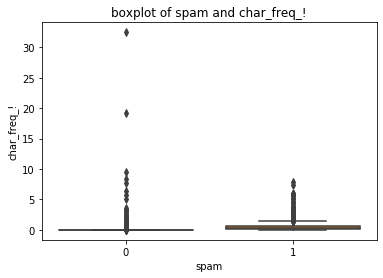

In [3]:
bp = sns.boxplot(x="spam", y="char_freq_!:", data=df)
plt.xlabel('spam')
plt.ylabel('char_freq_!')
plt.title('boxplot of spam and char_freq_!')
plt.show()

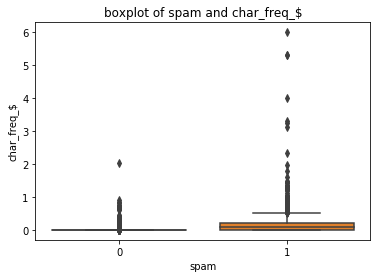

In [37]:
bp = sns.boxplot(x="spam", y="char_freq_$:", data=df)
plt.xlabel('spam')
plt.ylabel('char_freq_$')
plt.title('boxplot of spam and char_freq_$')
plt.show()

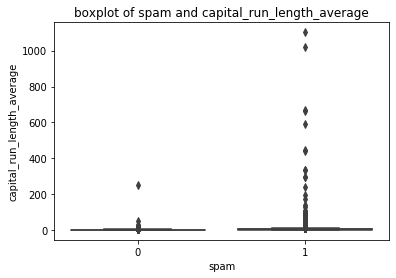

In [35]:
bp = sns.boxplot(x="spam", y="capital_run_length_average:", data=df)
plt.xlabel('spam')
plt.ylabel('capital_run_length_average')
plt.title('boxplot of spam and capital_run_length_average')
plt.show()

### 3. Visualize the univariate distribution of each of the variables in the previous question.  

#### char_freq_!:

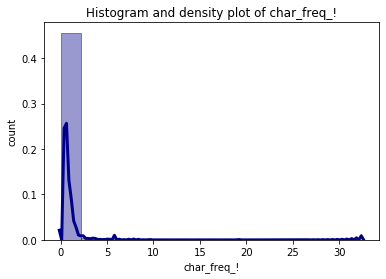

In [38]:
sns.distplot(df['char_freq_!:'], hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('char_freq_!')
plt.ylabel('count')
plt.title('Histogram and density plot of char_freq_!')
plt.show()

#### char_freq_$:

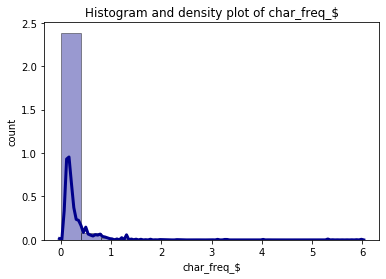

In [39]:
sns.distplot(df['char_freq_$:'], hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('char_freq_$')
plt.ylabel('count')
plt.title('Histogram and density plot of char_freq_$')
plt.show()

#### capital_run_length_average:

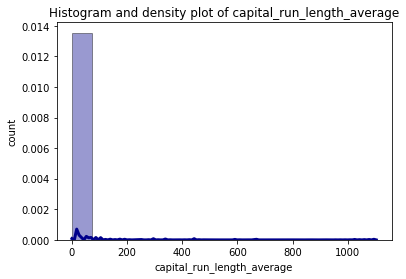

In [40]:
sns.distplot(df['capital_run_length_average:'], hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('capital_run_length_average')
plt.ylabel('count')
plt.title('Histogram and density plot of capital_run_length_average')
plt.show()

### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

#### 'spam' is a categorical variable so we should choose classification models. We've learned logistic regression, logistic regression with penalty, knn, SVM, decision tree, bagging, random forests and boosting to predict such categorical variables.

### 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

#### We use training data to train the model and then use the test data to evaluate the accuracy of the model. If we use all the data available to train a model, we might get high accuracy on the dataset but when using the model on other data, the accuracy will be lower as the model might take in too many features that are only shown in the training dataset, which is also called overfitting. While with test data aside, we can use it to detect the problem of overfitting and choose a model that have the highest accuracy on  the test dataset.

### 6. What is k-fold cross validation and what do we use it for?

#### k-fold cross validation is a way of validating models. We split the training dataset randomly into k folds of approximately equal size. Each time one of the k folds serve as test data, and the rest (k-1) folds are used to train the model. We do this k times so every part was once a test data. We then use the average of the accuracy on the part of test data to present the accuracy of the model.

### 7. How is k-fold cross validation different from stratified k-fold cross validation?

#### In k-fold cross validation, the data are splitted into k folds randomly, while for stratified k-fold cross validation, we will need to ensure relative class frequencies in each fold reflect class frequencies on the whole dataset.

### 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  



#### Split the data into training and test subsets.

In [8]:
X = df.loc[:,['char_freq_!:','char_freq_$:','capital_run_length_average:']]
y = df.loc[:,'spam']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

#### Scale the data

In [9]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#avoid warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,1,100,1e90]} 

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid,cv=10)
grid.fit(X_train_scaled, y_train)

#find the best C
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))

best parameters: {'C': 100}
test-set score: 0.823
best mean cross-validation score: 0.821


#### I used GridSearchCV to find the C that can give the higest mean cross-validation score and the best C is 100.

### 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

#### knn

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25, 2)} 
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,cv=10)
grid.fit(X_train_scaled, y_train)

#find the best k
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))

best parameters: {'n_neighbors': 17}
test-set score: 0.861
best mean cross-validation score: 0.870


#### I used GridSearchCV to find the n_neighbors that can give the higest mean cross-validation score and the best n_neighbors is 17. knn gave a better 'test-set score' of 0.861 compared with that of 0.823 from logistic regression.

#### SVM

In [ ]:
from sklearn.svm import SVC
param_grid = {'kernel': ['linear'，'rbf'],'C':[100,1E10]} 
grid = GridSearchCV(SVC(), param_grid=param_grid,cv=10)
grid.fit(X_train_scaled, y_train)

#find the best C
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))


#take too long to get the result

### 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

#### bagging

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier() #Need to instantiate a model type for bagging first
param_grid = {'n_estimators':[500,1000,2000]}


grid = GridSearchCV(BaggingClassifier(tree,random_state=1), param_grid=param_grid,cv=10)
grid.fit(X_train, y_train)

#find the best n_estimators
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))

best parameters: {'n_estimators': 1000}
test-set score: 0.851
best mean cross-validation score: 0.859


#### I used GridSearchCV to find the n_estimators that can give the higest mean cross-validation score and the best n_estimators is 1000. This model didn't give a better 'test-set score' compared with the previous models.

### 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

#### random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [100,200,500],'max_depth':[10,50],'criterion':['gini','entropy']} 
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,cv=10)
grid.fit(X_train, y_train)

#find the best n_estimators
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))

best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
test-set score: 0.867
best mean cross-validation score: 0.880


#### I used GridSearchCV to find the n_estimators that can give the higest mean cross-validation score and the best n_estimators is 100, the best max_depth is 10, and the best criterion is gini. This model gives a better 'test-set score' of 0.867 compared with that of 0.861 from knn.

### 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  

In [34]:
#RFE feature selection
X = df.drop(['spam'], axis=1)
y = df.loc[:,'spam']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

forest = RandomForestClassifier(n_estimators=200)
formodel = forest.fit(X_train, y_train)

selector = RFE(formodel,6, step=1) 
selector = selector.fit(X_train, y_train) 

print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

Num Features: 6
Selected Features: [False False False False False False  True False False False False False
 False False False  True False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False  True False False]
Feature Ranking: [30 24 17 46  7 22  1 14 29 20 21 12 32 37 44  1 18 19  5 28  1 36 10  6
  4 15  8 23 43 33 40 49 38 50 34 27 13 51 35 47 48 26 42 41 16 11 52 45
 25  9 39  1  1 31  1  2  3]


In [20]:
X = df.loc[:,['char_freq_!:','char_freq_$:','capital_run_length_average:','word_freq_remove:','word_freq_free:','capital_run_length_longest:']]
y = df.loc[:,'spam']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#random forest (best model in the previous question)
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [100,200,500],'max_depth':[10,50],'criterion':['gini','entropy']} 
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,cv=10)
grid.fit(X_train, y_train)

#find the best n_estimators
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))

best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 500}
test-set score: 0.905
best mean cross-validation score: 0.920


#### This model predicts better than the previous model, with 'test-set score' at 0.905 and 'best mean cross-validation score' at 0.920, both higher than the model with 3 variables.

### 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,1,100,1e90]} 

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid,cv=10)
grid.fit(X_train_scaled, y_train)

#find the best C
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))

best parameters: {'C': 1e+90}
test-set score: 0.857
best mean cross-validation score: 0.860


In [26]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25, 2)} 
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,cv=10)
grid.fit(X_train_scaled, y_train)

#find the best k
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))

best parameters: {'n_neighbors': 5}
test-set score: 0.877
best mean cross-validation score: 0.901


In [ ]:
#SVM
from sklearn.svm import SVC
param_grid = {'kernel': ['linear'，'rbf'],'C':[100,1E10]} 
grid = GridSearchCV(SVC(), param_grid=param_grid,cv=10)
grid.fit(X_train_scaled, y_train)

#find the best C
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))


#take too long to get the result

In [29]:
#bagging
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier() #Need to instantiate a model type for bagging first
param_grid = {'n_estimators':[500,1000,2000]}


grid = GridSearchCV(BaggingClassifier(tree,random_state=1), param_grid=param_grid,cv=10)
grid.fit(X_train, y_train)

#find the best n_estimator
print("best parameters: {}".format(grid.best_params_))

#evaluate prediction error on test data
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

#evaluate prediction error using k-fold cross-validation
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))

best parameters: {'n_estimators': 500}
test-set score: 0.907
best mean cross-validation score: 0.915


#### I will choose random forest with the 6 variables, n_estimators=500, max_depth=10 and criterion='gini' as the final model because it has the highest 'best mean cross-validation score' (0.920) among all models, meaning that it has higher accuracy when doing prediction.

### 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

#### Adding 'word_freq_your:' might increase the predictive power. As this variable has pretty different distribution for spams and non-spams.

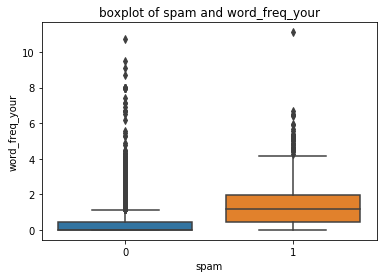

In [35]:
bp = sns.boxplot(x="spam", y="word_freq_your:", data=df)
plt.xlabel('spam')
plt.ylabel('word_freq_your')
plt.title('boxplot of spam and word_freq_your')
plt.show()

### 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

#### For data with a continuous dependent variable, we need regression models. We've learnt linear regression, ridge, lasso, knn, svm, decision tree, bagging, random forest and boosting.